In [1]:
import sklearn.metrics as metrics
#from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def mean_absolute_percentage_error(y_test,y_pred):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    errors = abs(y_test - y_pred)
    mape = 100 * np.mean(errors / y_test)
    print('mape---{}'.format(mape))
    mape1= np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    return mape


In [3]:
def calculate_metrics(y, ypred):
    MAE = metrics.mean_absolute_error(y, ypred)
    RMSE = metrics.mean_squared_error(y, ypred,squared=False)
    mse=metrics.mean_squared_error(y,ypred)
    r2=metrics.r2_score(y,ypred)

    return MAE,RMSE,mse,r2

In [4]:
#price_usd_df=pd.read_excel("/content/drive/MyDrive/Dissertation/My Dissertation/Data/After preprocessing/Bitcoin price and forex in USD_next day_after smoothing.xlsx")
price_usd_df=pd.read_excel("/content/drive/MyDrive/Dissertation/My Dissertation/Data/Pre-processed results/Removed missing values.xlsx")

print(price_usd_df.dtypes)
price_usd_df.head(21)

Date      datetime64[ns]
XBTUSD           float64
AUDUSD           float64
CADUSD           float64
CNYUSD           float64
EURUSD           float64
GBPUSD           float64
JPYUSD           float64
NZDUSD           float64
SGDUSD           float64
dtype: object


,Date,XBTUSD,AUDUSD,CADUSD,CNYUSD,EURUSD,GBPUSD,JPYUSD,NZDUSD,SGDUSD
0,2017-01-03,1024.38,0.7219,0.7448,0.14385,1.0405,1.2237,0.008493,0.6918,0.6895
1,2017-01-04,1091.66,0.7283,0.7519,0.14504,1.0489,1.2323,0.008529,0.6970,0.6948
2,2017-01-05,971.26,0.7338,0.7562,0.14547,1.0607,1.2419,0.008669,0.7026,0.7001
3,2017-01-06,898.16,0.7301,0.7555,0.14424,1.0532,1.2287,0.008547,0.6960,0.6950
4,2017-01-08,917.41,0.7301,0.7555,0.14424,1.0532,1.2287,0.008547,0.6960,0.6950
5,2017-01-09,897.51,0.7354,0.7567,0.14416,1.0574,1.2163,0.008617,0.7016,0.6962
6,2017-01-10,909.81,0.7368,0.7557,0.14435,1.0554,1.2177,0.008637,0.6990,0.6963
7,2017-01-11,789.11,0.7441,0.7589,0.14471,1.0582,1.2213,0.008665,0.7055,0.7008
8,2017-01-12,827.63,0.7484,0.7608,0.14515,1.0613,1.2162,0.008717,0.7095,0.7006
9,2017-01-13,830.70,0.7502,0.7625,0.14506,1.0643,1.2182,0.008733,0.7131,0.6998


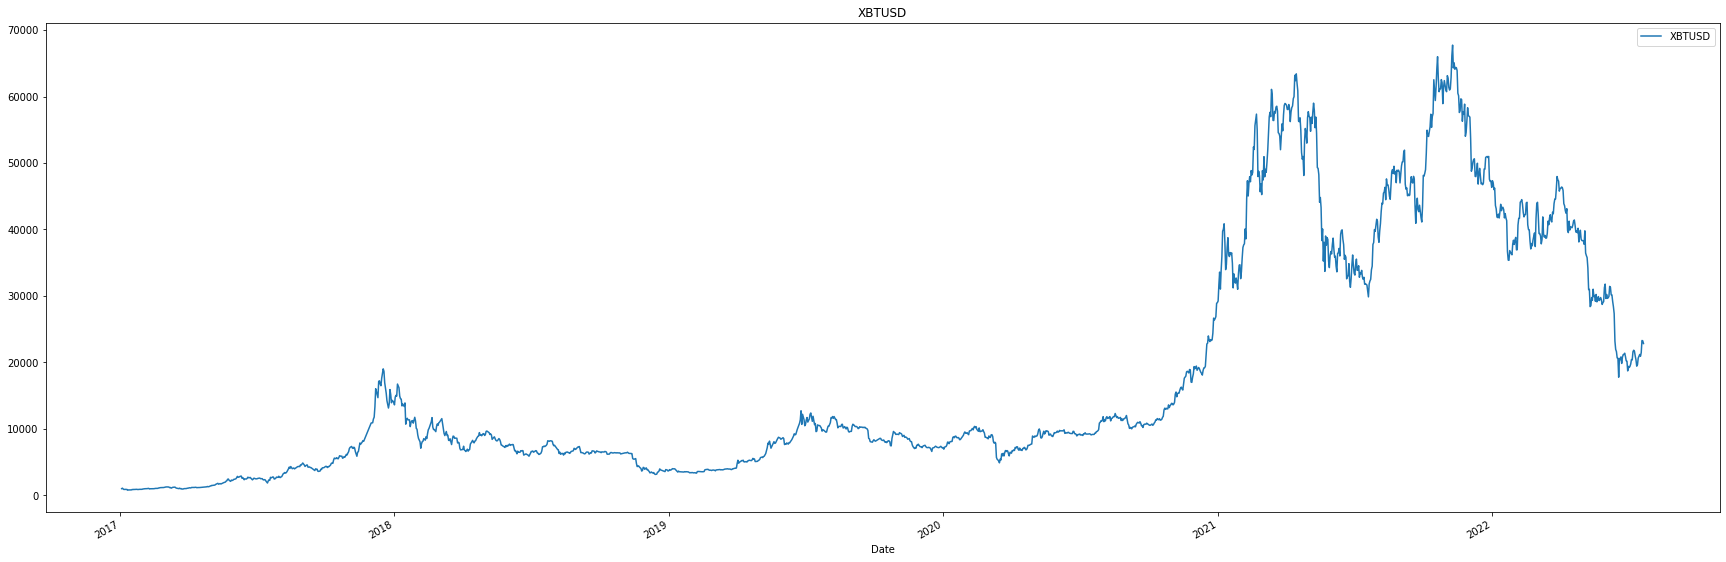

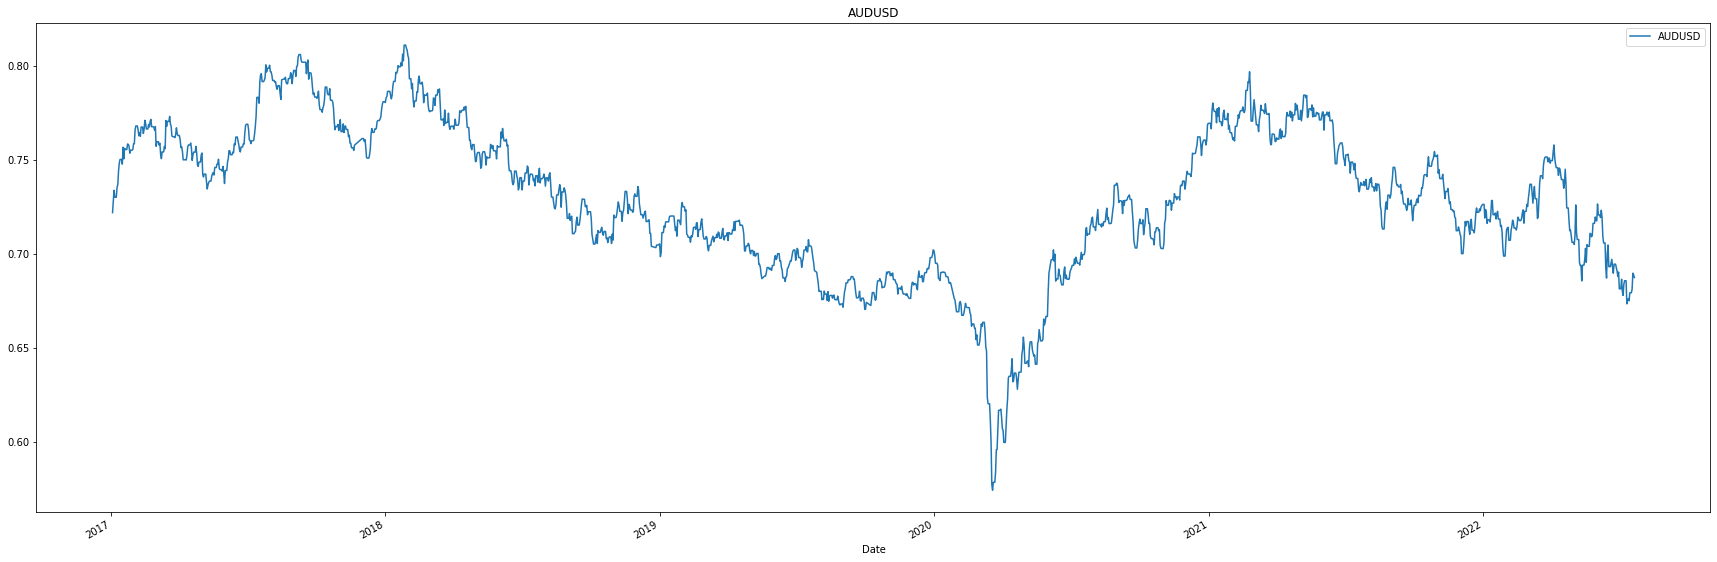

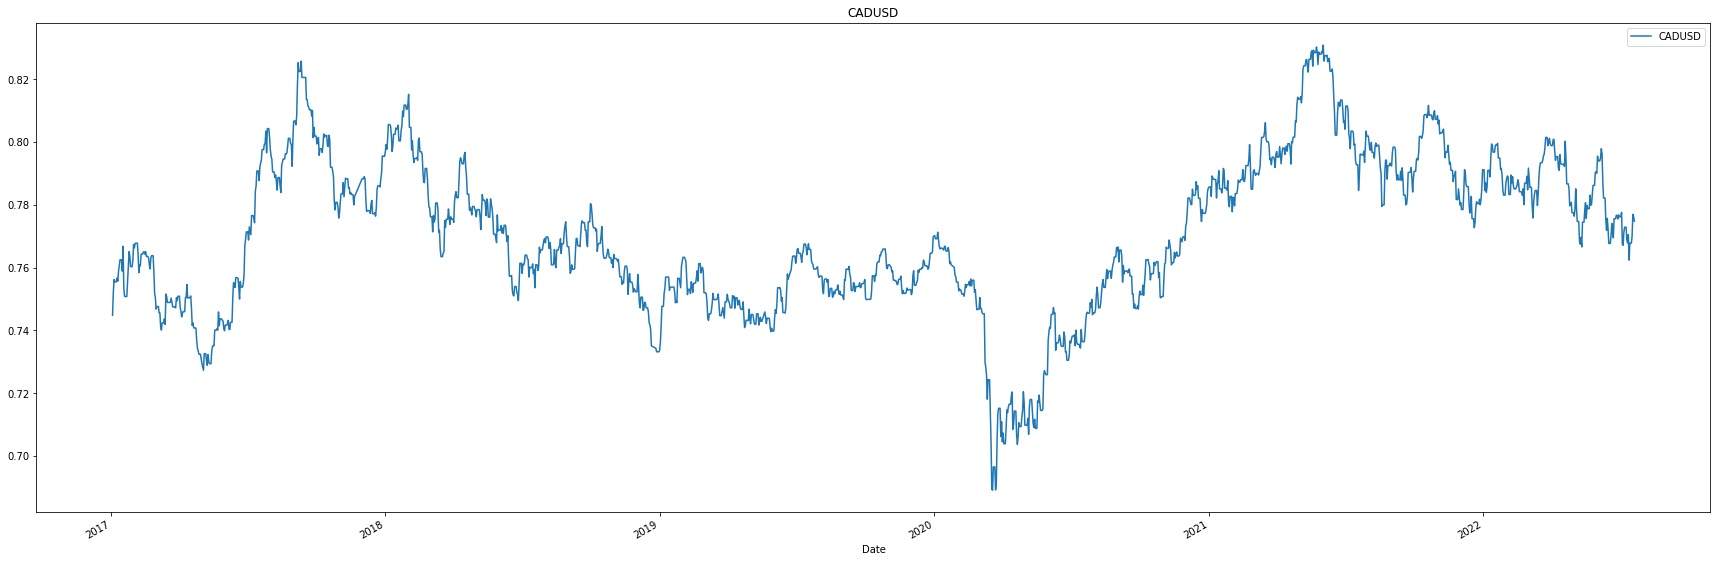

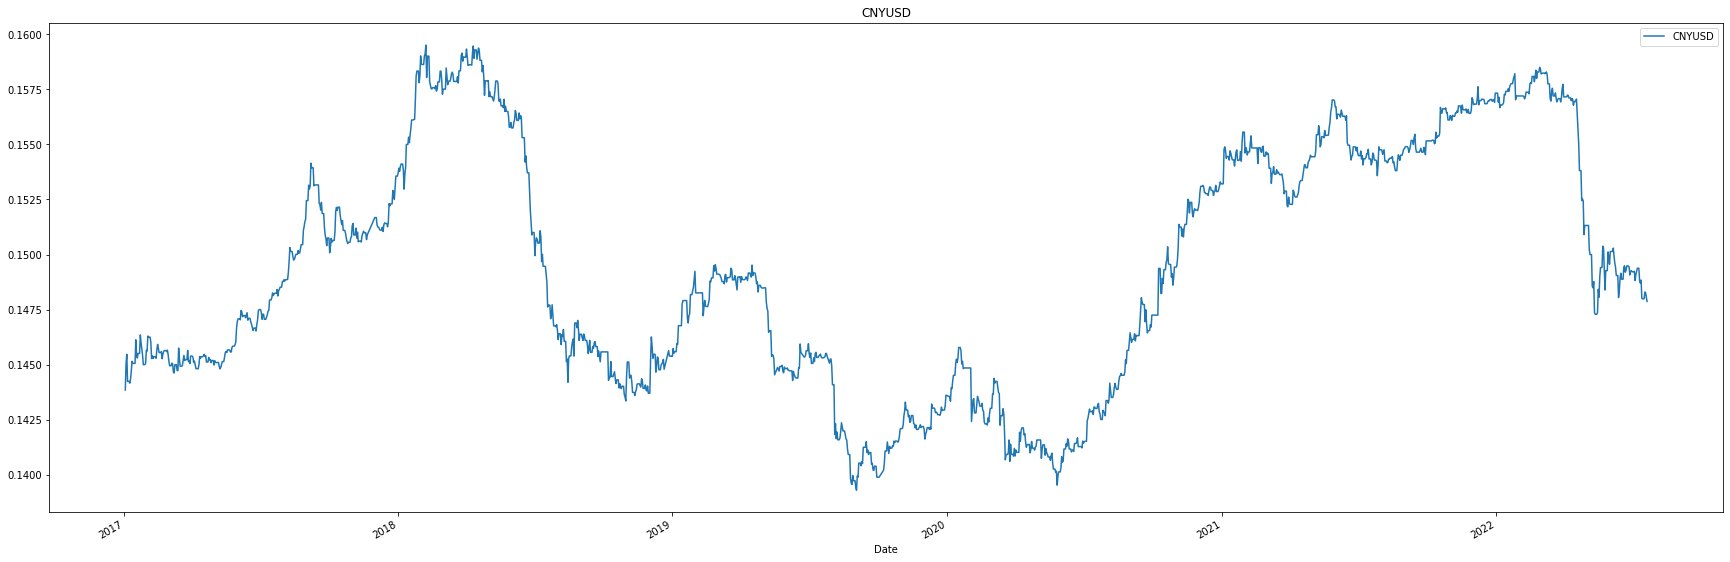

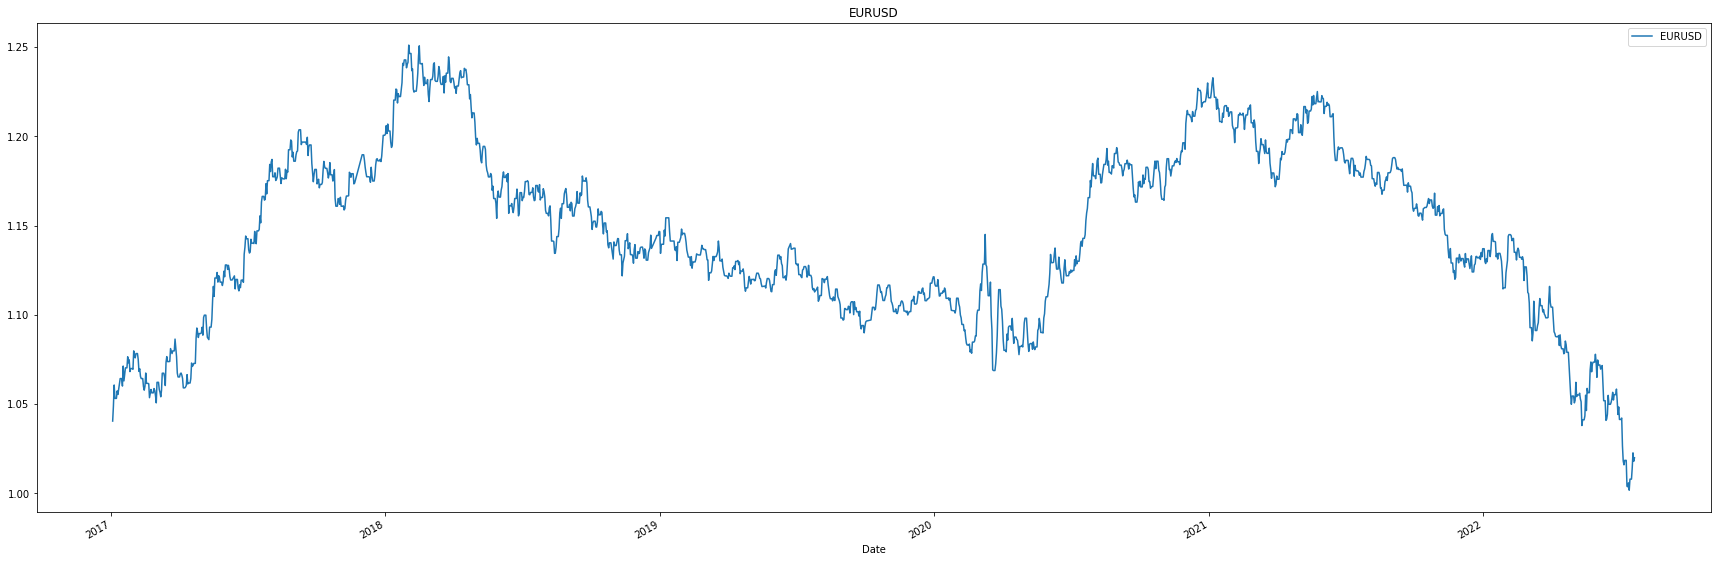

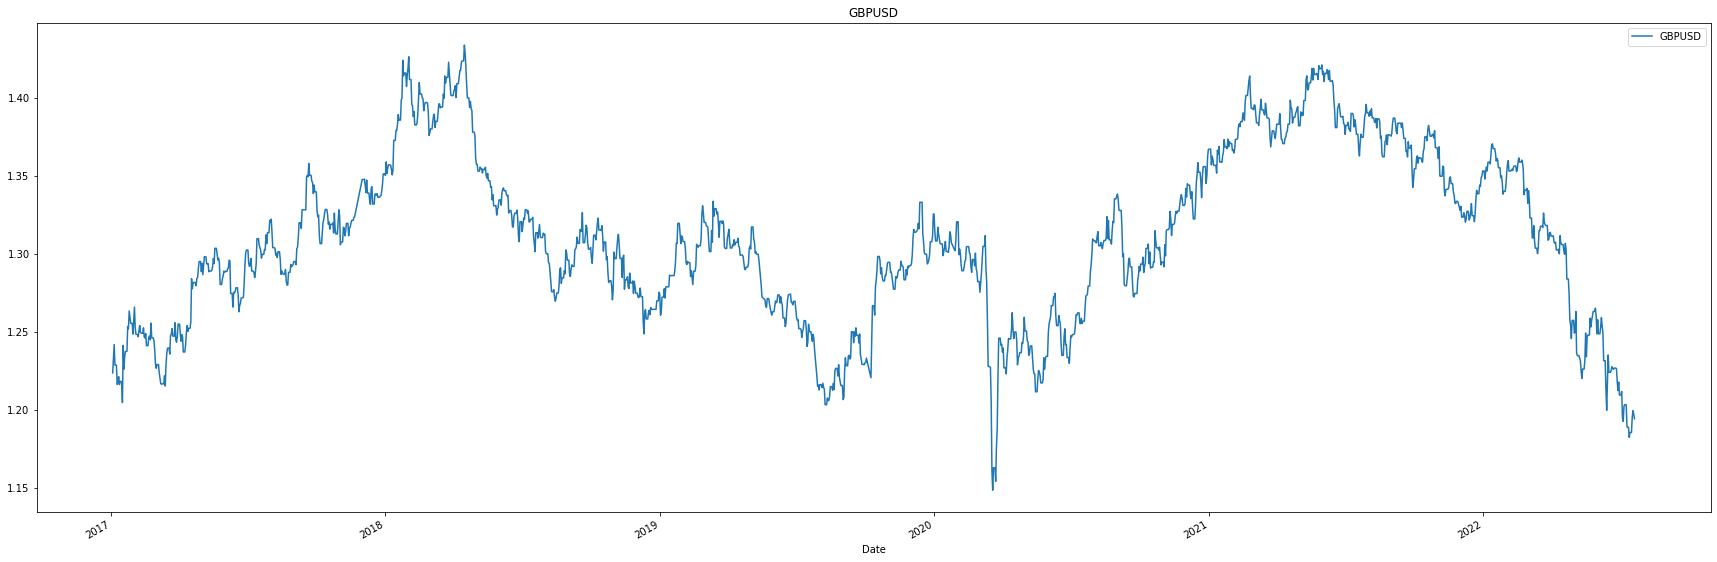

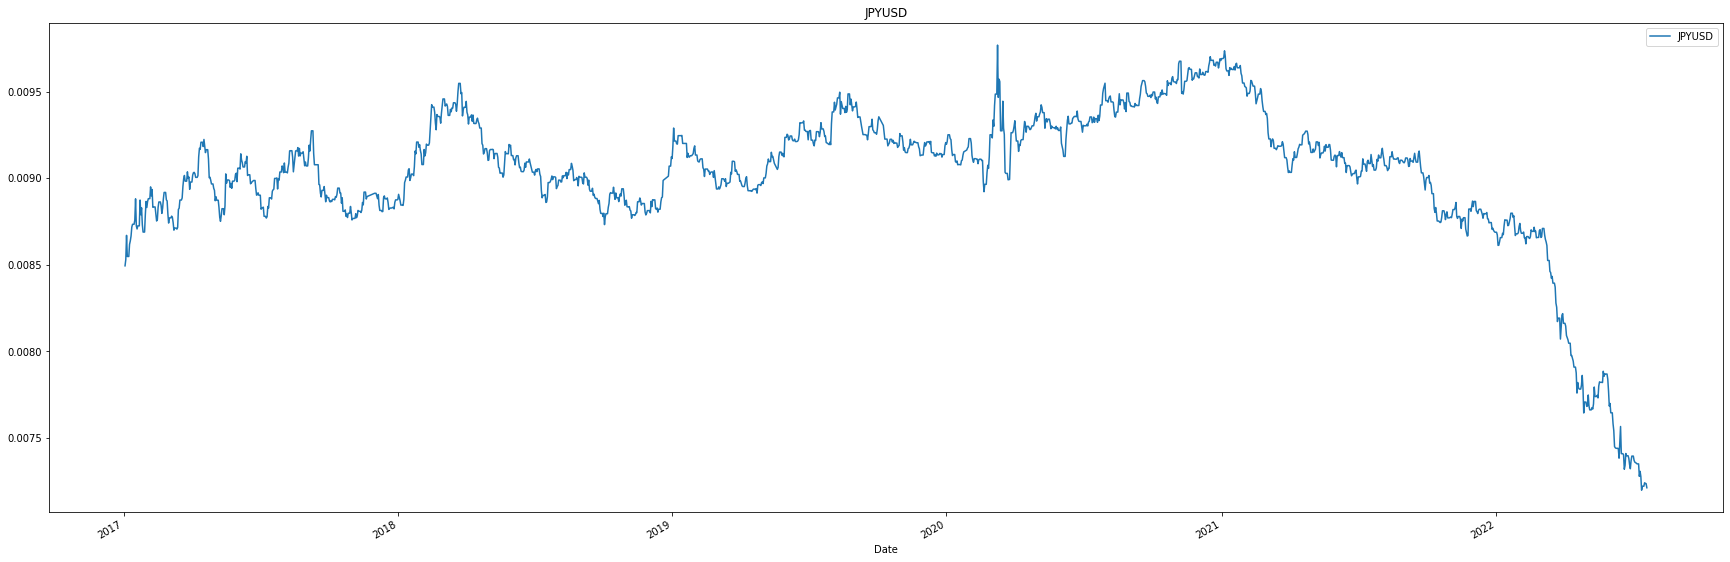

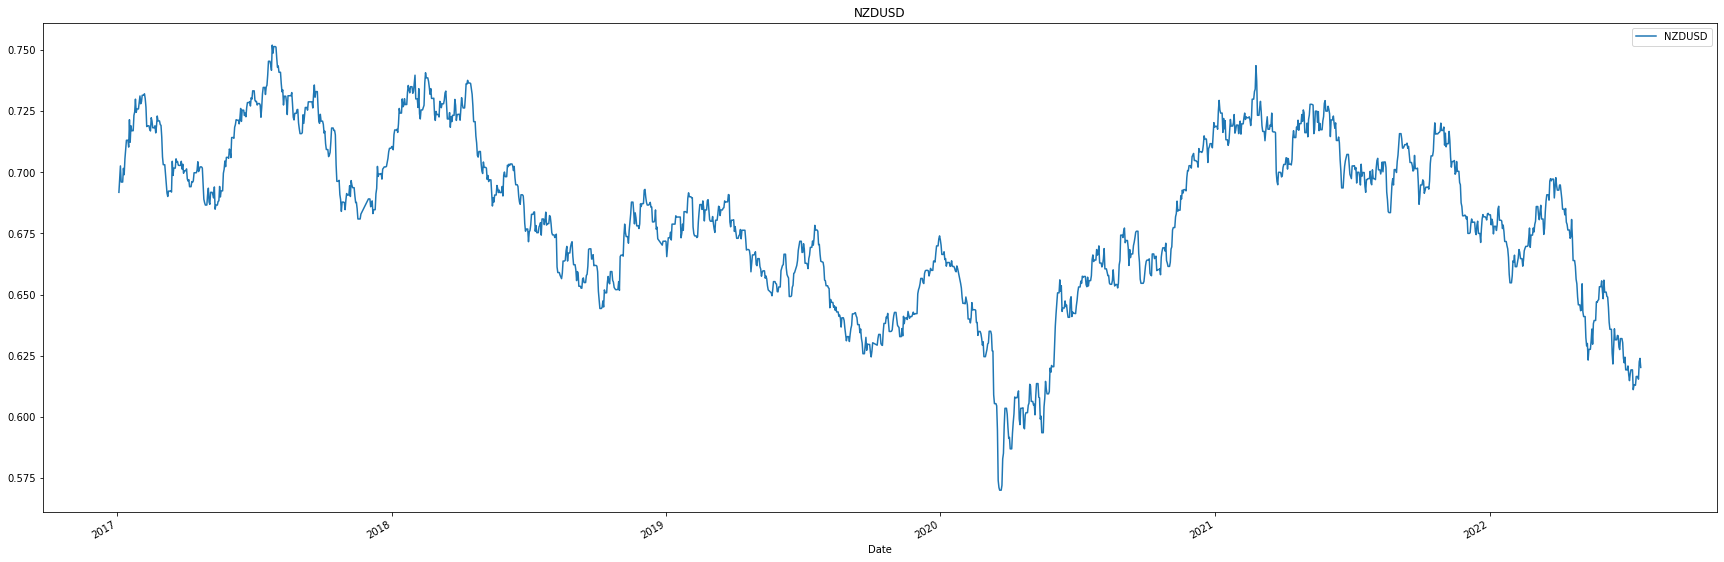

In [5]:
import matplotlib.pyplot as plt
column_list=price_usd_df.columns
colour =['red','blue','green','grey','yellow','pink','orange','black','brown']
for i in column_list[1:len(price_usd_df.columns)-1]:
  price_usd_df.plot(x='Date',y=i,subplots=True,figsize=(30,10))
  plt.title(i)
  plt.xlabel = 'Date'
  plt.ylabel = 'price in'+ i


df=price_usd_df



In [6]:
df=df.drop(['Date'],axis=1)
df.columns

Index(['XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD', 'SGDUSD'],
      dtype='object')

In [7]:
n_features=len(df.columns)
n_features

9

In [8]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [9]:
# split a dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [10]:
# walk-forward validation for multivariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-n_features], test[i, -n_features]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = metrics.mean_absolute_error(test[:, -n_features], predictions)
	return error, test[:, -n_features], predictions

In [11]:
# fit an xgboost model and make a one step prediction
def random_forest_forecast(train, testX):
  # transform list into array
  train = np.asarray(train)
	# split into input and output columns
  trainX, trainy = train[:, :-n_features], train[:, -n_features]
	# fit model
  model = RandomForestRegressor(n_estimators=1000)
  model.fit(trainX, trainy)
	# make a one-step prediction
  yhat = model.predict([testX])
  return yhat[0]

In [33]:
values = df.values

In [65]:
data = series_to_supervised(values, n_in=7)
split_point=int(0.2*len(data))
split_point
 

365

In [35]:
mae_base, y, yhat_base = walk_forward_validation(data,split_point)
print(mae_base)

1190.9499496994458


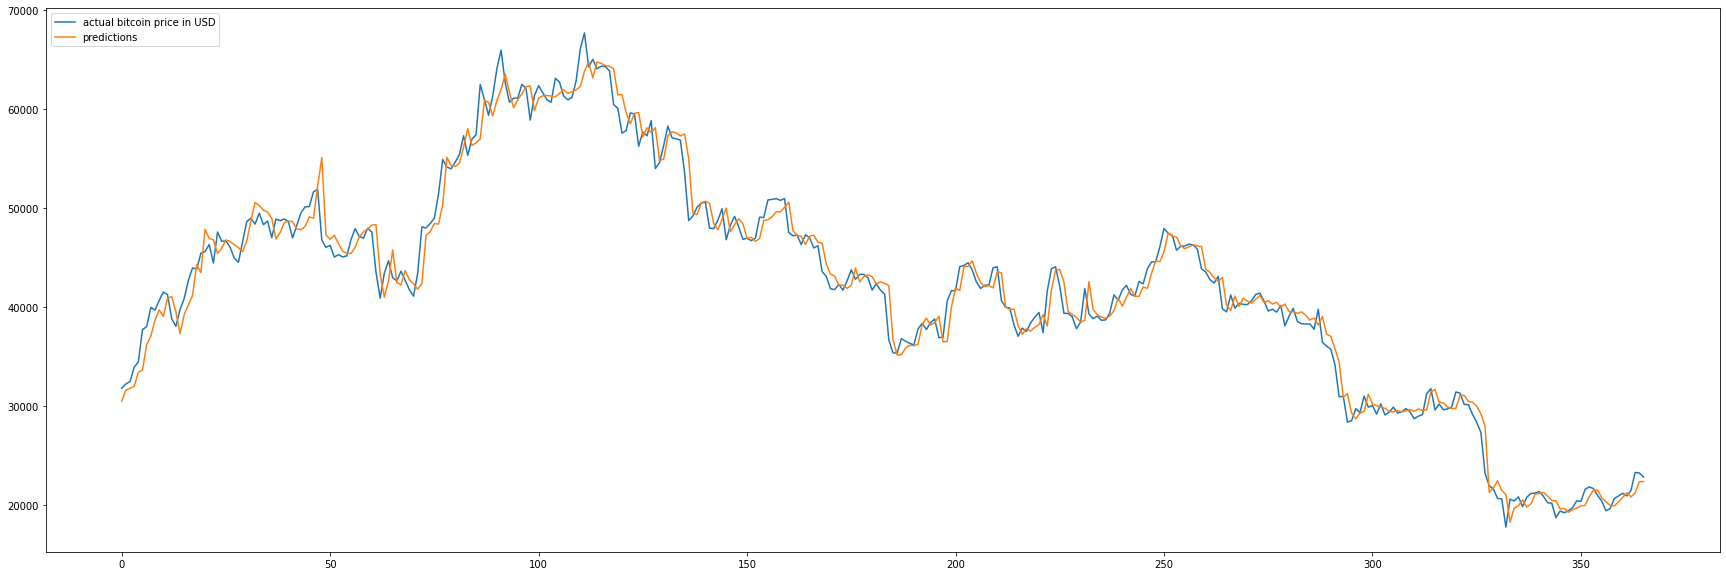

In [36]:
plt.rcParams["figure.figsize"] = (30,10)
plt.plot(y,label='actual bitcoin price in USD')
plt.plot(yhat_base,label='predictions')
plt.legend(loc="upper left")
plt.show()

In [37]:
mape = mean_absolute_percentage_error(y,yhat_base)
mae,rmse,mse,r2=calculate_metrics(y,yhat_base)
print('Results of Random forest model before tuning')
print('MAPE  :{:0.4f}'.format(mape))
print('MAE  :{:0.4f}'.format(mae))
print('RMSE :{:0.4f} '.format(rmse))
print('MSE :{:0.4f} '.format(mse))
print('r2   :{:0.4f}'.format(r2))

mape---2.9394254765935073
Results of Random forest model before tuning
MAPE  :2.9394
MAE  :1190.9499
RMSE :1661.4369 
MSE :2760372.4913 
r2   :0.9787


In [38]:
print('mean of test Y   :{:0.4f}'.format(y.mean()))
print('max of test Y   :{:0.4f}'.format(y.max()))
print('min of test Y   :{:0.4f}'.format(y.min()))

mean of test Y   :42215.6181
max of test Y   :67734.0400
min of test Y   :17785.0900


In [39]:
scaled_rmse_base=rmse/(y.max()-y.min())
print('scaled_rmse   :{:0.4f}'.format(scaled_rmse_base))

scaled_rmse   :0.0333


# ***Hyperparameter Tuning***

In [66]:
# Tuning hyper parameters using randomisedsearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [67]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [68]:
from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 3, 5, 10, 15],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 500, 900, 1100, 1500]}


In [69]:
rf_model=RandomForestRegressor()

In [70]:
pprint(rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [71]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [72]:
train1,test1=train_test_split(data, split_point)

In [73]:
train_X1,train_Y1=train1[:, :-n_features], train1[:, -n_features]

In [74]:
rf_random.fit(train_X1, train_Y1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, verbose=2)

In [75]:
rf_random.best_params_, rf_random.best_estimator_

({'bootstrap': True,
  'max_depth': 15,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 500},
 RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500))

In [77]:
def randomForest_forecast_tuned(train, testX):
  # transform list into array
  train = np.asarray(train)
	# split into input and output columns
  trainX, trainy = train[:, :-n_features], train[:, -n_features]
	# fit model
  #model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
  #model=RandomForestRegressor(n_estimators=100,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=15,bootstrap=True)
  model= RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500)
  model.fit(trainX, trainy)
	# make a one-step prediction
  yhat = model.predict([testX])
  return yhat[0]

In [78]:
def walk_forward_validation_tuned(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-n_features], test[i, -n_features]
		# fit model on history and make a prediction
		yhat = randomForest_forecast_tuned(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = metrics.mean_absolute_error(test[:, -n_features], predictions)
	return error, test[:, -n_features], predictions

In [79]:
mae, y1, yhat1 = walk_forward_validation_tuned(data,split_point)
print(mae)

1212.8005674636734


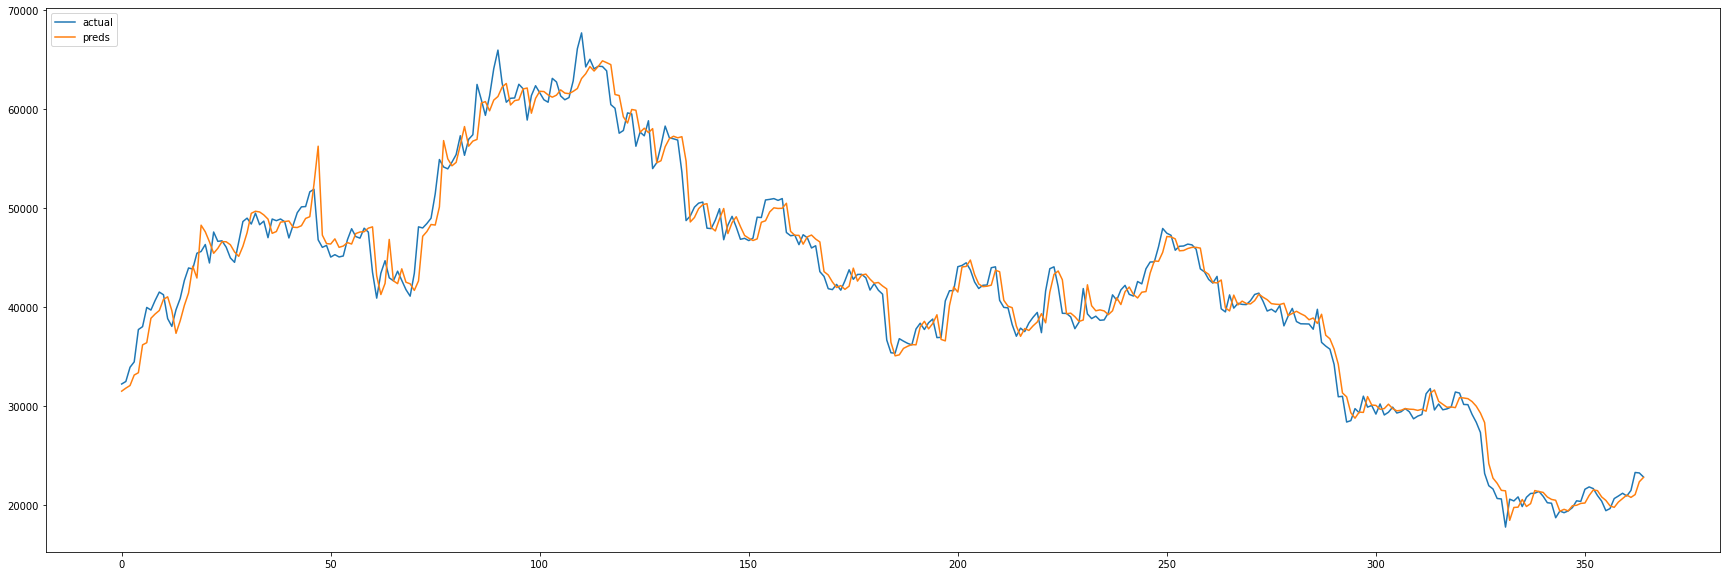

In [80]:
plt.rcParams["figure.figsize"] = (30,10)
plt.plot(y1,label='actual')
plt.plot(yhat1,label='preds')
plt.legend(loc="upper left")
plt.show()

In [81]:
mape = mean_absolute_percentage_error(y1,yhat1)
mae,rmse,mse,r2=calculate_metrics(y1,yhat1)
print('Results of Random Forest model after tuning')
print('MAPE  :{:0.4f}'.format(mape))
print('MAE  :{:0.4f}'.format(mae))
print('RMSE :{:0.4f} '.format(rmse))
print('MSE :{:0.4f} '.format(mse))
print('r2   :{:0.4f}'.format(r2))

mape---2.993001162454096
Results of Random Forest model after tuning
MAPE  :2.9930
MAE  :1212.8006
RMSE :1701.4645 
MSE :2894981.4286 
r2   :0.9776


In [82]:
print('mean of test Y   :{:0.4f}'.format(y1.mean()))
print('max of test Y   :{:0.4f}'.format(y1.max()))
print('min of test Y   :{:0.4f}'.format(y1.min()))

scaled_rmse_tuned=rmse/(y1.max()-y1.min())
print('scaled_rmse   :{:0.4f}'.format(scaled_rmse_tuned))


mean of test Y   :42244.1028
max of test Y   :67734.0400
min of test Y   :17785.0900
scaled_rmse   :0.0341
